In [2]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt


In [3]:
#Problem 1.1
def left_endpoint_sum(f, a, b, n):
  length = (b-a)/n
  sum = 0
  for i in range(n):
    sum = sum + f(length*(i)+a)*length
  return sum

def right_endpoint_sum(f, a, b, n):
  length = (b-a)/n
  sum = 0
  for i in range(1,n+1):
    sum = sum + f(length*(i)+a)*length
  return sum

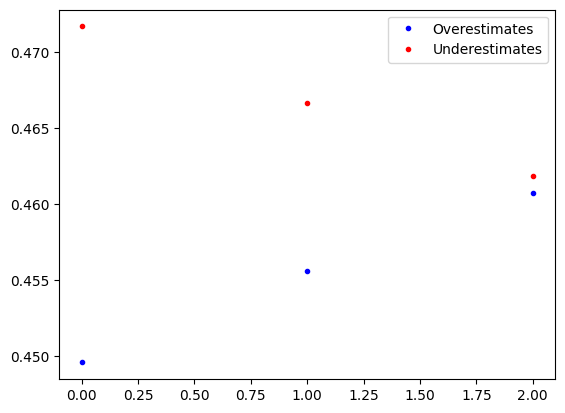

In [4]:
#Problem 1.2

x = sy.symbols("x")
exp = np.e**((-1)*x**2)
f = sy.lambdify(x,exp)

a=0.0
b=0.5

listOfAppUp = []
listOfAppDow = []
n = [5,10,100]

for i in n:
  listOfAppDow.append(left_endpoint_sum(f,a,b,i))
  listOfAppUp.append(right_endpoint_sum(f,a,b,i))


plt.plot(np.arange(len(listOfAppUp)),listOfAppUp, ".b", label = "Overestimates")
plt.plot(np.arange(len(listOfAppDow)),listOfAppDow, ".r", label = "Underestimates")
plt.legend()
plt.show()


In [5]:
#Problem 2.1
def trapezoid_sum(f,a,b,n):
  return (left_endpoint_sum(f,a,b,n)+right_endpoint_sum(f,a,b,n))/2

def midpoint_sum(f,a,b,n):
  length = (b-a)/n
  sum = 0
  for i in range(0,n):
    sum = sum + f(length*(i+1/2)+a)*length
  return sum  

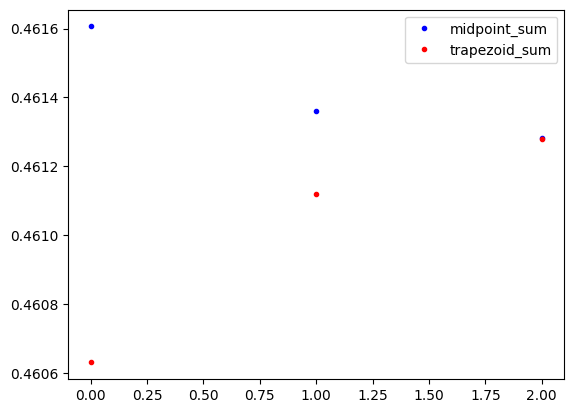

In [6]:
#Problem 2.2
x = sy.symbols("x")
exp = np.e**((-1)*x**2)
f = sy.lambdify(x,exp)

a=0.0
b=0.5

midpointSum = []
trapezoidSum = []
n = [5,10,100]

for i in n:
  midpointSum.append(midpoint_sum(f,a,b,i))
  trapezoidSum.append(trapezoid_sum(f,a,b,i))


plt.plot(np.arange(len(midpointSum)),midpointSum, ".b", label = "midpoint_sum")
plt.plot(np.arange(len(trapezoidSum)),trapezoidSum, ".r", label = "trapezoid_sum")
plt.legend()
plt.show()

In [6]:
#Problem 3.1

${S_n = \frac{1}{3} \frac{b-a}{n}∑_{i=1}^{\frac{n}{2}}[f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})]}$


In [7]:
#Problem 3.2
def simpsons_rule_sum(f,a,b,n):
  if n%2 != 0 or n <= 0:
    raise Exception(str(n) + " is not in even")
  else:
    length = (b-a)/n
    sum = 0
    for i in range(1,int(n/2+1)):
      sum = sum + (f(length*(2*i-2)+a) + 4*f(length*(2*i-1)+a) + f(length*(2*i)+a))*length
    return sum/3    

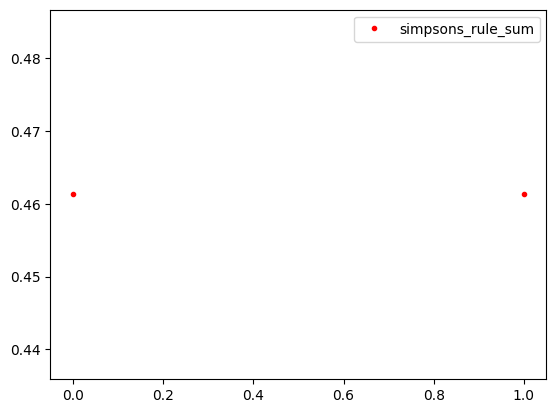

In [8]:
#Problem 3.3
x = sy.symbols("x")
exp = np.e**((-1)*x**2)
f = sy.lambdify(x,exp)

a=0.0
b=0.5

n = [10,100]
simpsonsRuleSum = []

for i in n:
  simpsonsRuleSum.append(simpsons_rule_sum(f,a,b,i))

plt.plot(np.arange(len(simpsonsRuleSum)),np.round(simpsonsRuleSum,6), ".r", label = "simpsons_rule_sum")
plt.legend()
plt.show()

In [9]:
#Problem 4.1 
x = sy.symbols("x")
exp = np.e**((-1)*x**2)
f = sy.lambdify(x,exp)

a=0.0
b=0.5
n = 10
print(midpoint_sum(f,a,b,n))
print(trapezoid_sum(f,a,b,n))
print(simpsons_rule_sum(f,a,b,n))

k = 2

em = k*(b-a)**3/(24*n**2)
et = k*(b-a)**3/(12*n**2)
es = k*(b-a)**5/(180*n**4)

print(em,et,es)

0.46136216108720957
0.4611187224310249
0.4612811419522122
0.00010416666666666667 0.00020833333333333335 3.472222222222222e-08


In [25]:
#Problem 4.2 
x = sy.symbols("x")
exp1 = 1/x
dexp1 = sy.diff(exp1,x)
ddexp1 = sy.diff(dexp1,x)
f1 = sy.lambdify(x,exp1)
ddf1 = sy.lambdify(x,ddexp1)

a1=1
b1=5
n1=10

k=2

em = k*(b1-a1)**3/(24*n1**2)
et = k*(b1-a1)**3/(12*n1**2)
es = k*(b1-a1)**5/(180*n1**4)
er = 0
el = 0


print("R10: ",right_endpoint_sum(f1,a1,b1,n1))
print("A bound on the error ,Er : ", abs(right_endpoint_sum(f1,a1,b1,n1) - left_endpoint_sum(f1,a1,b1,n1)))
print("")
print("M10: ",midpoint_sum(f1,a1,b1,n1))
print("A bound on the error ,Em : ", em)
print("")
print("S10: ",simpsons_rule_sum(f1,a1,b1,n1))
print("A bound on the error ,Es : ", es)
print("")
print("T10: ",trapezoid_sum(f1,a1,b1,n1))
print("A bound on the error ,Et : ", et)
print("")
print("L10: ",left_endpoint_sum(f1,a1,b1,n1))
print("A bound on the error ,El : ", abs(left_endpoint_sum(f1,a1,b1,n1) - right_endpoint_sum(f1,a1,b1,n1)))


R10:  1.462039010629669
A bound on the error ,Er :  0.31999999999999984

M10:  1.6032106782106783
A bound on the error ,Em :  0.05333333333333334

S10:  1.610082994086225
A bound on the error ,Es :  0.0011377777777777777

T10:  1.622039010629669
A bound on the error ,Et :  0.10666666666666667

L10:  1.7820390106296689
A bound on the error ,El :  0.31999999999999984
